In [2]:
import nba_data, ml
data_30_train = nba_data.run_predictions_simulation('2015-10-20', '2016-05-01', 30)
data_30 = nba_data.run_predictions_simulation('2016-10-30', '2017-04-13', 30)
# data_test = nba_data.run_predictions_simulation('2016-11-04', '2016-11-05', 10)

In [5]:
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.feature_selection import SelectFromModel, VarianceThreshold
import math

def get_dataframe(dataset):
	cols = ['fg2',
	        'fg2m',
	        'fg3',
	        'fg3m',
	        'ft',
	        'ftm',
	        'orb',
	        'drb',
	        'ast',
	        'stl',
	        'blk',
	        'tov',
	        'pf',
	        'pts']

	outcomes_all, predictions_all = [], []

	for game in dataset:
	    outcomes_all.extend(game[1][3])
	    predictions_all.append(game[0][0])
	    predictions_all.append(game[0][1])

	df = pd.DataFrame(predictions_all, columns=cols)
# 	df['is_home'] = pd.Series([1 if i % 2 != 0 else 0 for i in range(len(predictions_all))])
	df['outcome'] = pd.Series(outcomes_all, index=df.index)
	return df


def train_model(train, target):
	df_train = get_dataframe(train)
	df_predict = get_dataframe(target)
	outcomes_train = df_train['outcome']
	outcomes_predict = df_predict['outcome']

	# drop columns from train/predict df
	df_train = df_train.drop(['outcome', 'pts'], axis=1)
	df_predict = df_predict.drop(['outcome', 'pts'], axis=1)

	X, y = df_train, outcomes_train
	lasso = Lasso().fit(X, y)
	linearreg = LinearRegression().fit(X, y)

	model = linearreg

	print(model.coef_)

	X_predict, y_predict = df_predict, outcomes_predict
	predictions = model.predict(X_predict)

	return (predictions, outcomes_predict)


def test_model(predictions_away, predictions_home, outcomes_away, outcomes_home, vegas):
	correct_guesses = 0
	profit = 0

	for i in range(len(vegas)):
		predict_away, predict_home = predictions_away[i], predictions_home[i]
		outcome_away, outcome_home = outcomes_away[i], outcomes_home[i]

		spread_predicted = predict_away - predict_home
		spread_actual = outcome_away - outcome_home
		spread_vegas = vegas[i]

		if math.fabs(spread_actual - spread_predicted) < math.fabs(spread_actual - spread_vegas):
			correct_guesses += 1
			profit += 100
		#             print("CORRECT")
		else:
			profit -= 110

		#         print("outcome: %s\t predicted: %s \t vegas: %s" % (spread_actual, spread_predicted, spread_vegas))

	print(correct_guesses / len(vegas))
	print(profit)

In [6]:
predictions_away, outcomes_away = train_model(data_30_train[::2], data_30[::2])
predictions_home, outcomes_home = train_model(data_30_train[1::2], data_30[1::2])
vegas = [game[2] for game in data_30]

test_model(predictions_away, predictions_home, outcomes_away, outcomes_home, vegas)

[ 0.46221395 -0.25155187  0.38516115  0.33432983  0.33193296  0.13511733
  0.46636413  0.15508689  0.62380757  0.05678903  0.14482467 -0.50428331
  0.09878056]
[ 0.38207474 -0.40316062  0.98480507 -0.14939812  0.31155511  0.01067929
  0.51497133  0.35147166  0.51195518  0.77001795 -0.44174783 -0.20324436
  0.08198358]
0.558648111332008
7360


In [1]:
# from sklearn.linear_model import Lasso, LinearRegression
# from sklearn.feature_selection import SelectFromModel, VarianceThreshold
# import math

# def train_model(train, target):
#     df_train = ml.get_dataframe(train)
#     df_predict = ml.get_dataframe(target)
#     outcomes_train = df_train['outcome']
#     outcomes_predict = df_predict['outcome']

#     # drop columns from train/predict df
#     df_train = df_train.drop(['outcome', 'pts'], axis=1)
#     df_predict = df_predict.drop(['outcome', 'pts'], axis=1)

#     X, y = df_train, outcomes_train
#     lasso = Lasso().fit(X, y)
#     linearreg = LinearRegression().fit(X, y)

#     model = linearreg

#     print(model.coef_)

#     X_predict, y_predict = df_predict, outcomes_predict
#     predictions = model.predict(X_predict)

#     return (predictions, outcomes_predict)

In [10]:
# def test_model(predictions_away, predictions_home, outcomes_away, outcomes_home, vegas):
#     correct_guesses = 0
#     profit = 0

#     for i in range(len(vegas)):
#         predict_away, predict_home = predictions_away[i], predictions_home[i]
#         outcome_away, outcome_home = outcomes_away[i], outcomes_home[i]

#         spread_predicted = predict_away - predict_home
#         spread_actual = outcome_away - outcome_home
#         spread_vegas = vegas[i]

#         if math.fabs(spread_actual - spread_predicted) < math.fabs(spread_actual - spread_vegas):
#             correct_guesses += 1
#             profit += 100
# #             print("CORRECT")
#         else:
#             profit -= 110

# #         print("outcome: %s\t predicted: %s \t vegas: %s" % (spread_actual, spread_predicted, spread_vegas))

#     print(correct_guesses / len(vegas))
#     print(profit)

In [41]:
# vegas = [game[2] for game in data_30]
# predictions_away = [predictions[i] for i in range(len(predictions)) if i % 2 == 0]
# predictions_home = [predictions[i] for i in range(len(predictions)) if i % 2 == 1]
# outcomes_away = [outcomes_predict[i] for i in range(len(predictions)) if i % 2 == 0]
# outcomes_home = [outcomes_predict[i] for i in range(len(predictions)) if i % 2 == 1]
# correct_guesses = 0
# profit = 0

# for i in range(len(vegas)):
#     predict_away, predict_home = predictions_away[i], predictions_home[i]
#     outcome_away, outcome_home = outcomes_away[i], outcomes_home[i]

#     spread_predicted = predict_away - predict_home
#     spread_actual = outcome_away - outcome_home
#     spread_vegas = vegas[i]
    
# #     bet_over = 1 if predicted_spread > vegas[i] else 0
#     if math.fabs(spread_actual - spread_predicted) < math.fabs(spread_actual - spread_vegas):
#         correct_guesses += 1
#         profit += 100
#     else:
#         profit -= 110
        
# #     print("outcome: %s\t predicted: %s \t vegas: %s" % (spread_actual, spread_predicted, spread_vegas))
            
# print(correct_guesses / len(vegas))

0.44731610337972166


In [4]:
# ml.matrix_feature_correlations(data_30)
ml.matrix_feature_correlations(data_30_unadj)

,fg,fga,fg3,fg3a,ft,fta,orb,drb,ast,stl,blk,tov,pf,pts,is_home,outcome
fg,1.000000,0.924771,0.516578,0.499208,0.620659,0.628970,0.442771,0.751837,0.719983,0.552719,0.359681,0.571614,0.522923,0.966394,0.066253,0.172311
fga,0.924771,1.000000,0.471456,0.538409,0.631335,0.646419,0.518774,0.786488,0.627902,0.546022,0.323635,0.597358,0.571171,0.907362,0.072701,0.114381
fg3,0.516578,0.471456,1.000000,0.939150,0.348403,0.324435,-0.038045,0.374797,0.566136,0.278319,0.093014,0.317428,0.225644,0.635650,0.027789,0.210615
fg3a,0.499208,0.538409,0.939150,1.000000,0.381268,0.374304,0.030935,0.428674,0.537532,0.289630,0.071685,0.368144,0.267658,0.620955,0.038873,0.186436
ft,0.620659,0.631335,0.348403,0.381268,1.000000,0.960098,0.355776,0.530944,0.435428,0.470709,0.208592,0.528711,0.476003,0.763005,0.052662,0.135378
fta,0.628970,0.646419,0.324435,0.374304,0.960098,1.000000,0.408786,0.581953,0.422638,0.456276,0.219833,0.573405,0.493461,0.754450,0.051278,0.125563
orb,0.442771,0.518774,-0.038045,0.030935,0.355776,0.408786,1.000000,0.449554,0.129352,0.301315,0.253710,0.358716,0.428465,0.401699,0.027864,0.058309
drb,0.751837,0.786488,0.374797,0.428674,0.530944,0.581953,0.449554,1.000000,0.521946,0.393297,0.427868,0.552401,0.467832,0.740735,0.057119,0.070784
ast,0.719983,0.627902,0.566136,0.537532,0.435428,0.422638,0.129352,0.521946,1.000000,0.537288,0.279008,0.513564,0.267237,0.727088,0.053442,0.178771
stl,0.552719,0.546022,0.278319,0.289630,0.470709,0.456276,0.301315,0.393297,0.537288,1.000000,0.302398,0.437332,0.483737,0.565746,0.059677,0.089705


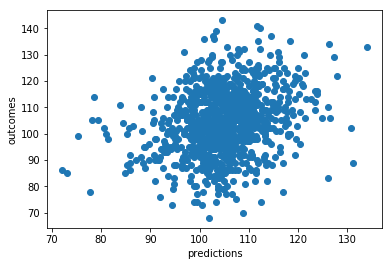

[[ 1.          0.26917284]
 [ 0.26917284  1.        ]]


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# outcomes_10, predictions_10, spreads_10 = [], [], []
outcomes_30, predictions_30, spreads_30 = [], [], []

# for game in data_10:
#     prediction, outcome, vegas = game[0], game[1][3], game[2]
    
#     predictions_10.append(prediction[1] - prediction[0])
#     outcomes_10.append(outcome[1] - outcome[0])
#     spreads_10.append(vegas)
    
for game in data_30:
    prediction, outcome, vegas = game[0], game[1][3], game[2]
    
#     predictions_30.append(prediction[1] - prediction[0])
    predictions_30.append(prediction[0])
#     outcomes_30.append(outcome[1] - outcome[0])
    outcomes_30.append(outcome[0])
    spreads_30.append(vegas)

# fig = plt.figure()
# ax_10 = fig.add_subplot(1, 1, 1)
# ax_10.scatter(predictions_10, outcomes_10)
# ax_10.set_xlabel('predictions')
# ax_10.set_ylabel('outcomes')
# ax_30.set_ylabel('outcomes')
# plt.show()
# print(np.corrcoef(predictions_10,outcomes_10))

fig = plt.figure()
ax_30 = fig.add_subplot(1, 1, 1)
ax_30.scatter(predictions_30, outcomes_30)
ax_30.set_xlabel('predictions')
ax_30.set_ylabel('outcomes')

# plt.hist(predictions, normed=True, bins=30)
plt.show()

print(np.corrcoef(predictions_30,outcomes_30))

Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


/Users/Elliot/venv/light_years/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


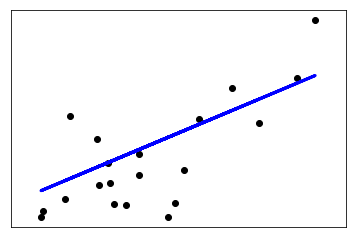